# Nama Kelompok :
1. Andy Nugraha Putra
2. Athallah Adjani Prasanna Basuki
3. Bonifasius Ekky Kusumawardhana
4. Elvaretta Salsabilla
5. Nafi'ul Alam Dary Vega

# KUIS 1 PEMBELAJARAN MESIN
Klasifikasi SVM Pada Data Citra
# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [ ]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

*Penjelasan :*
1. **import numpy as np**: Mengimpor library NumPy dan memberinya alias np untuk penggunaan yang lebih singkat. NumPy digunakan untuk operasi numerik dan array.
2. **import pandas as pd**: Mengimpor library Pandas dan memberinya alias pd. Pandas digunakan untuk manipulasi dan analisis data.
3. **from sklearn.datasets import fetch_lfw_people**: Mengimpor fungsi fetch_lfw_people dari library scikit-learn (sklearn). Fungsi ini digunakan untuk memuat dataset Labeled Faces in the Wild (LFW).
4. **from sklearn.model_selection import train_test_split**: Mengimpor fungsi train_test_split dari sklearn untuk membagi dataset menjadi data latih dan data uji.
5. **from sklearn.svm import SVC**: Mengimpor kelas SVC dari sklearn. SVC digunakan untuk membuat model Support Vector Machine (SVM).
6. **from sklearn.metrics import confusion_matrix, accuracy_score, classification_report**: Mengimpor fungsi confusion_matrix, accuracy_score, dan classification_report dari sklearn untuk evaluasi model.
7. **import matplotlib.pyplot as plt**: Mengimpor library Matplotlib dan memberinya alias plt untuk visualisasi data.
8. **import seaborn as sns**: Mengimpor library Seaborn dan memberinya alias sns untuk visualisasi data yang lebih menarik. Seaborn dibangun di atas Matplotlib.

# Load Data

In [ ]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

*Penjelasan :*
1. **faces = fetch_lfw_people(min_faces_per_person=10, color=True)**: Memuat dataset LFW menggunakan fungsi fetch_lfw_people.
  *   **min_faces_per_person=10**: Hanya memuat wajah orang yang memiliki minimal 10 gambar dalam dataset.
  *   **color=True**: Memuat gambar dalam format warna (RGB).
2. **print(f'Total Label: {len(faces.target_names)}')**: Mencetak total label (nama orang) dalam dataset.
3. **print(f'Data dimension: {faces.images.shape}')**: Mencetak dimensi data gambar. Outputnya berupa tuple yang menunjukkan jumlah gambar, tinggi gambar, dan lebar gambar.
4. **print(f'Images flatten dimension: {faces.data.shape}')**: Mencetak dimensi data gambar yang telah diratakan. Setiap gambar diubah menjadi vektor satu dimensi. Outputnya berupa tuple yang menunjukkan jumlah gambar dan jumlah fitur (piksel) per gambar.

In [ ]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

*Penjelasan :*
1. **rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]**: Membuat list rand_labels yang berisi 15 bilangan acak.
  *   Setiap bilangan acak merupakan indeks untuk mengakses gambar di **faces.data**.
2. **fig, ax = plt.subplots(3, 5)**: Membuat figure dan axes untuk menampilkan gambar.
  *   **plt.subplots(3, 5)**: Membuat 3 baris dan 5 kolom subplot, total 15 subplot.
3. **fig.tight_layout()**: Menyesuaikan layout agar subplot tidak saling tumpang tindih.
4. **for i, axi in enumerate(ax.flat):**: Looping melalui setiap subplot di ax. ax.flat meratakan array ax menjadi satu dimensi.
  *   **enumerate**: memberikan indeks (i) dan objek subplot (axi) untuk setiap iterasi.
5. **axi.imshow(faces.images[rand_labels[i]], cmap='bone')**: Menampilkan gambar pada subplot axi.
  *   **faces.images[rand_labels[i]]**: mengambil gambar dari dataset menggunakan indeks acak yang telah dibuat sebelumnya.
  *   **cmap='bone'**: menggunakan colormap "bone" untuk menampilkan gambar.
6. **axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[rand_labels[i]]])**: Mengatur properti subplot axi.
  *   **xticks=[], yticks=[]**: menghilangkan tanda centang pada sumbu x dan y.
  *   **xlabel=faces.target_names[faces.target[rand_labels[i]]] **: menambahkan label di bawah setiap gambar. Label ini diambil dari faces.target_names berdasarkan indeks yang sesuai dengan gambar yang ditampilkan.

# Preprocessing

In [ ]:
from skimage.transform import resize
from skimage.color import rgb2gray

# Preprocessing - Normalizing images
# Convert images to grayscale jika perlu
faces_gray = np.array([rgb2gray(image) for image in faces.images])

# Normalize pixel values to range [0, 1]
faces_normalized = faces.data / 255.0

# Penyesuaian ukuran gambar
faces_resized = np.array([resize(image, (40, 40)) for image in faces_gray])

# membagi model input
X = faces_resized.reshape(faces_resized.shape[0], -1)  # Flatten images
y = faces.target  # Target labels

# Membagi data set menjadi data training dan data tes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


*Penjelasan :*
1. **from skimage.transform import resize**: Mengimpor fungsi resize dari library skimage.transform. Fungsi ini digunakan untuk mengubah ukuran gambar.
2. **from skimage.color import rgb2gray**: Mengimpor fungsi rgb2gray dari library skimage.color. Fungsi ini digunakan untuk mengubah gambar berwarna (RGB) menjadi gambar grayscale.
3. **faces_gray = np.array([rgb2gray(image) for image in faces.images])**: Mengubah setiap gambar dalam faces.images menjadi grayscale dan menyimpannya dalam array NumPy faces_gray.
4. **faces_normalized = faces.data / 255.0**: Menormalkan nilai piksel dalam faces.data ke rentang [0, 1] dengan membaginya dengan 255.0.
5. **faces_resized = np.array([resize(image, (40, 40)) for image in faces_gray])**: Mengubah ukuran setiap gambar dalam faces_gray menjadi 40x40 piksel dan menyimpannya dalam array NumPy faces_resized.
6. **X** = faces_resized.reshape(faces_resized.shape[0], -1): Meratakan setiap gambar dalam faces_resized menjadi vektor satu dimensi dan menyimpannya dalam array NumPy X.
7. **y** = faces.target: Menyimpan label target untuk setiap gambar dalam array NumPy y.
8. **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)**: Memanggil fungsi train_test_split untuk membagi data.
  *   **X**: berisi data gambar yang sudah di preprocessing.
  *   **y**: berisi label yang sesuai dengan data gambar.
  *   **test_size=0.2**: Menentukan proporsi data yang akan digunakan sebagai data testing (20%).
  *   **random_state=42**: Menjamin bahwa pembagian data akan selalu sama setiap kali kode dijalankan.

In [ ]:
# tes image
# Generate random 15 images from from augmented images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0, 15)]

fig, ax = plt.subplots(3, 5, figsize=(12, 6))
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces_resized[rand_labels[i]], cmap='gray')  # Use resized images
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[y[rand_labels[i]]])

plt.show()

*Penjelasan :*
1. **rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0, 15)]**: Membuat list yang berisi 15 bilangan acak. Setiap bilangan merupakan indeks untuk mengambil gambar dari faces.data.
2. **fig, ax = plt.subplots(3, 5, figsize=(12, 6))**: Membuat figure dan axes untuk menampilkan gambar.
  *   **3, 5**: Menentukan grid 3 baris dan 5 kolom, sehingga total ada 15 subplot.
  *   **figsize=(12, 6)**: Menentukan ukuran figure.
3. **fig.tight_layout()**: Menyesuaikan layout figure agar subplot tidak saling tumpang tindih.
4. **for i, axi in enumerate(ax.flat):**: Melakukan iterasi pada setiap subplot. ax.flat meratakan array ax menjadi 1 dimensi. enumerate memberikan indeks (i) dan objek subplot (axi).
5. **axi.imshow(faces_resized[rand_labels[i]], cmap='gray')**: Menampilkan gambar pada subplot axi.
  *   **faces_resized[rand_labels[i]]**: Mengambil gambar dari faces_resized menggunakan indeks acak yang telah dibuat.
  *   **cmap='gray'**: Menentukan colormap grayscale untuk menampilkan gambar.
6. **axi.set(xticks=[], yticks=[], xlabel=faces.target_names[y[rand_labels[i]]])**: Mengatur properti subplot axi.
  *   **xticks=[], yticks=[]**: Menghilangkan tanda centang pada sumbu x dan y.
  *   **xlabel=faces.target_names[y[rand_labels[i]]]**: Menambahkan label nama orang di bawah gambar. Label diambil dari faces.target_names berdasarkan indeks yang sesuai dengan gambar.
7. **plt.show()**: Menampilkan figure yang telah dibuat.

# Features Extraction

In [ ]:
# Function to extract histogram features from an image
def extract_histogram(image, bins=256):

    # Compute histograms for R, G, and B channels
    r_hist = np.histogram(image[:, :, 0], bins=bins, range=(0, 256))[0]
    g_hist = np.histogram(image[:, :, 1], bins=bins, range=(0, 256))[0]
    b_hist = np.histogram(image[:, :, 2], bins=bins, range=(0, 256))[0]

    # Normalize the histograms
    r_hist = r_hist / r_hist.sum()
    g_hist = g_hist / g_hist.sum()
    b_hist = b_hist / b_hist.sum()

    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate([r_hist, g_hist, b_hist])

    return hist_features

# Apply the histogram extraction to all images in the dataset
hist_features = np.array([extract_histogram(image) for image in faces.images])

# Check the shape of the extracted features
print(f'Extracted histogram features shape: {hist_features.shape}')


*Penjelasan :*
1. **def extract_histogram(image, bins=256)**: Mendefinisikan fungsi extract_histogram yang menerima gambar sebagai input dan jumlah bin histogram sebagai parameter opsional.
2. **r_hist = np.histogram(image[:, :, 0], bins=bins, range=(0, 256))[0]**: Menghitung histogram untuk saluran merah (R) dari gambar.
  *   **image[:, :, 0]**: Memilih saluran merah dari gambar.
  *   **bins=bins**: Jumlah bin histogram.
  *   **range=(0, 256)**: Rentang nilai intensitas piksel.
  *   **[0]**: Mengambil array frekuensi histogram, bukan array batas bin.

3. **g_hist = np.histogram(image[:, :, 1], bins=bins, range=(0, 256))[0]**: Menghitung histogram untuk saluran hijau (G) dari gambar.
4. **b_hist = np.histogram(image[:, :, 2], bins=bins, range=(0, 256))[0]**: Menghitung histogram untuk saluran biru (B) dari gambar.
5. **r_hist = r_hist / r_hist.sum()**: Menormalisasi histogram saluran merah agar jumlah semua elemennya sama dengan 1.
6. **g_hist = g_hist / g_hist.sum()**: Menormalisasi histogram saluran hijau.
7. **b_hist = b_hist / b_hist.sum()**: Menormalisasi histogram saluran biru.
8. **hist_features = np.concatenate([r_hist, g_hist, b_hist])**: Menggabungkan ketiga histogram saluran menjadi satu vektor fitur.
9. **return hist_features**: Mengembalikan vektor fitur histogram yang telah diekstrak.
10. **hist_features = np.array([extract_histogram(image) for image in faces.images])**: Melakukan iterasi melalui setiap gambar dalam faces.images.
extract_histogram(image): Memanggil fungsi extract_histogram untuk setiap gambar.
  *   Hasil iterasi disimpan dalam array hist_features.
11. **print(f'Extracted histogram features shape: {hist_features.shape}')**: Mencetak dimensi dari array hist_features untuk memeriksa bentuk fitur yang telah diekstrak.

# Build Model

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(hist_features, faces.target, test_size=0.3, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)


*Penjelasan :*
1. **X_train, X_test, y_train, y_test = train_test_split(hist_features, faces.target, test_size=0.3, random_state=42)**: Membagi data fitur (hist_features) dan label (faces.target) menjadi set pelatihan dan pengujian.
  *   **test_size=0.3**: 30% data untuk pengujian.
  *   **random_state=42**: Menjamin pembagian data yang konsisten.
2. **svm_model = SVC(kernel='linear', random_state=42)**: Membuat objek model SVM dengan kernel linear.
  *   **random_state=42**: Menjamin hasil yang konsisten.
3. **svm_model.fit(X_train, y_train)**: Melatih model SVM menggunakan data pelatihan (X_train dan y_train).
4. **y_pred = svm_model.predict(X_test)**: Memprediksi label untuk data pengujian (X_test) menggunakan model yang telah dilatih. Hasil prediksi disimpan di y_pred.

# Evaluation

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=faces.target_names)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.1325
Classification Report:
                           precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00         6
             Adrien Brody       0.00      0.00      0.00         2
         Alejandro Toledo       0.00      0.00      0.00         7
             Alvaro Uribe       0.00      0.00      0.00        11
          Amelie Mauresmo       0.00      0.00      0.00         7
             Andre Agassi       0.00      0.00      0.00         4
             Andy Roddick       0.00      0.00      0.00         5
           Angelina Jolie       0.00      0.00      0.00         3
              Ann Veneman       0.00      0.00      0.00         3
          Anna Kournikova       0.00      0.00      0.00         3
            Ari Fleischer       0.00      0.00      0.00         5
             Ariel Sharon       0.00      0.00      0.00        20
    Arnold Schwarzenegger       0.00      0.00      0.00        21
     Atal Bihari Vajp

*Penjelasan :*
1.
```javascript
accuracy = accuracy_score(y_test, y_pred) = Menghitung akurasi model berdasarkan label sebenarnya (y_test) dan label yang diprediksi (y_pred).
```

2.
```javascript
class_report = classification_report(y_test, y_pred, target_names=faces.target_names)
```
= Membuat laporan klasifikasi yang mencakup metrik seperti precision, recall, dan F1-score untuk setiap kelas.
3.
```javascript
- print(f'Accuracy: {accuracy:.4f}')
- print('Classification Report:')
- print(class_report)
= Mencetak akurasi dan laporan klasifikasi ke konsol.
```
4.
```javascript
conf_matrix = confusion_matrix(y_test, y_pred)
```
 = Menghitung matriks kebingungan yang menunjukkan jumlah prediksi benar dan salah untuk masing-masing kelas
5.
```javascript
plt.figure(figsize=(10, 8))<br>
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=faces.<br>target_names, yticklabels=faces.target_names)<br>
plt.xlabel('Predicted')<br>
plt.ylabel('Actual')<br>
plt.title('Confusion Matrix')<br>
plt.show()
```
= Membuat heatmap dari matriks kebingungan untuk memvisualisasikan hasil prediksi model dengan jelas.


# Tantangan 1
Menggunakan fitur lain selain histogram

In [ ]:
# Extract LBP features
def extract_lbp_features(image, P=8, R=1):
    lbp = local_binary_pattern(image, P, R, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    return hist / np.sum(hist)
lbp_features = np.array([extract_lbp_features(rgb2gray(image)) for image in faces.images])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lbp_features, faces.target, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


*Penjelasan :*
1.
```javascript
def extract_lbp_features(image, P=8, R=1):
    lbp = local_binary_pattern(image, P, R, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    return hist / np.sum(hist)
```
= Menghitung Local Binary Pattern (LBP) dari gambar untuk mengekstrak fitur tekstur.
2.
```javascript
lbp_features = np.array([extract_lbp_features(rgb2gray(image)) for image in faces.images])
```
= Menggunakan pemahaman daftar untuk menerapkan extract_lbp_features pada setiap gambar dalam dataset faces.<br>
Gambar diubah menjadi grayscale sebelum ekstraksi fitur LBP.
3.
```javascript
X_train, X_test, y_train, y_test = train_test_split(lbp_features, faces.target, test_size=0.2, random_state=42)
```
= Menggunakan train_test_split untuk membagi fitur LBP (lbp_features) dan label target (faces.target) menjadi set pelatihan dan pengujian,test_size=0.2 berarti 20% data akan digunakan untuk pengujian, dan random_state=42 memastikan bahwa pembagian ini dapat direproduksi.


# Tantangan 2
Menggunakan model lain selain SVM


In [ ]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

*Penjelasan :*
1. rf_model = RandomForestClassifier(n_estimators=100, random_state=42) = Membuat objek RandomForestClassifier dari pustaka sklearn.ensemble.
- Parameter:<br>
n_estimators=100: Mengatur jumlah pohon keputusan yang akan dibangun dalam hutan (forest) menjadi 100.<br>
random_state=42: Menentukan seed untuk memastikan bahwa hasilnya dapat direproduksi.

2. rf_model.fit(X_train, y_train) = Melatih model menggunakan data pelatihan (X_train) dan label target (y_train),Proses ini membangun model berdasarkan fitur dan label yang diberikan.

3. y_pred = rf_model.predict(X_test) = Menggunakan model yang telah dilatih untuk memprediksi label dari data pengujian (X_test),Hasil prediksi disimpan dalam variabel y_pred.

# Tantangan 3
Evalusi dengan metric lain ataupun report dengan confusion matrix

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2642: UserWarning: labels size, 157, does not match size of target_names, 158
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

Accuracy: 0.1145
Classification Report:
                           precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00         5
             Adrien Brody       0.00      0.00      0.00         1
         Alejandro Toledo       0.00      0.00      0.00         2
             Alvaro Uribe       0.00      0.00      0.00         7
          Amelie Mauresmo       0.00      0.00      0.00         6
             Andre Agassi       0.00      0.00      0.00         2
             Andy Roddick       0.00      0.00      0.00         4
           Angelina Jolie       0.14      0.50      0.22         2
              Ann Veneman       0.00      0.00      0.00         1
          Anna Kournikova       0.00      0.00      0.00         1
            Ari Fleischer       0.00      0.00      0.00         4
             Ariel Sharon       0.23      0.40      0.29        15
    Arnold Schwarzenegger       0.00      0.00      0.00        15
     Atal Bihari Vajp

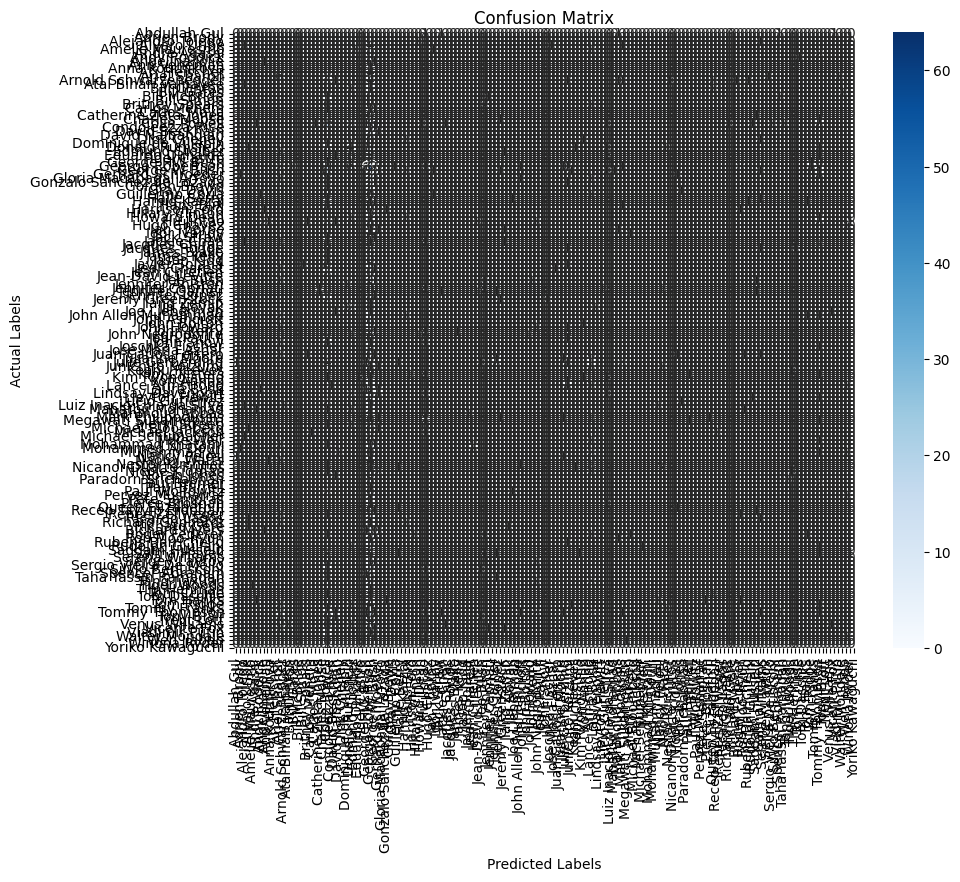

In [ ]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=faces.target_names, labels=np.unique(y_test))
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(class_report)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=faces.target_names, yticklabels=faces.target_names)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix (RandomForestClassifier)')
plt.show()


*Penjelasan :*
1.
```javascript
accuracy = accuracy_score(y_test, y_pred)<br>
class_report = classification_report(y_test, y_pred, target_names=faces.<br>target_names, labels=np.unique(y_test))<br>
conf_matrix = confusion_matrix(y_test, y_pred) =
```
<br>
 Akurasi:
- Menghitung akurasi model menggunakan accuracy_score, yang menunjukkan proporsi prediksi yang benar dari total prediksi.<br>
Laporan Klasifikasi:
- Membuat laporan klasifikasi menggunakan classification_report, yang memberikan metrik seperti precision, recall, dan F1-score untuk setiap kelas.<br>
Matriks Kebingungan:
- Menghitung matriks kebingungan menggunakan confusion_matrix, yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

2.
```javascript
print(f'Accuracy: {accuracy:.4f}')<br>
print('Classification Report:')<br>
print(class_report)
```
= Mencetak akurasi model dan laporan klasifikasi ke konsol untuk evaluasi lebih lanjut.

3.
```javascript
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()
```

- Menggunakan seaborn untuk membuat heatmap dari matriks kebingungan.
-  annot=True menampilkan angka di setiap sel, fmt='d' mengatur format sebagai desimal, dan cmap='Blues' menentukan skema warna.
- Label pada sumbu X dan Y diatur menggunakan nama kelas yang relevan